In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
file_path = 'Documents/Anexo 2 - Dataset Vehicle/car data.csv'
data = pd.read_csv(file_path)

In [4]:
data_info = data.info()
data_head = data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
data_info, data_head

(None,
   Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
 0     ritz  2014           3.35           5.59       27000    Petrol   
 1      sx4  2013           4.75           9.54       43000    Diesel   
 2     ciaz  2017           7.25           9.85        6900    Petrol   
 3  wagon r  2011           2.85           4.15        5200    Petrol   
 4    swift  2014           4.60           6.87       42450    Diesel   
 
   Seller_Type Transmission  Owner  
 0      Dealer       Manual      0  
 1      Dealer       Manual      0  
 2      Dealer       Manual      0  
 3      Dealer       Manual      0  
 4      Dealer       Manual      0  )

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

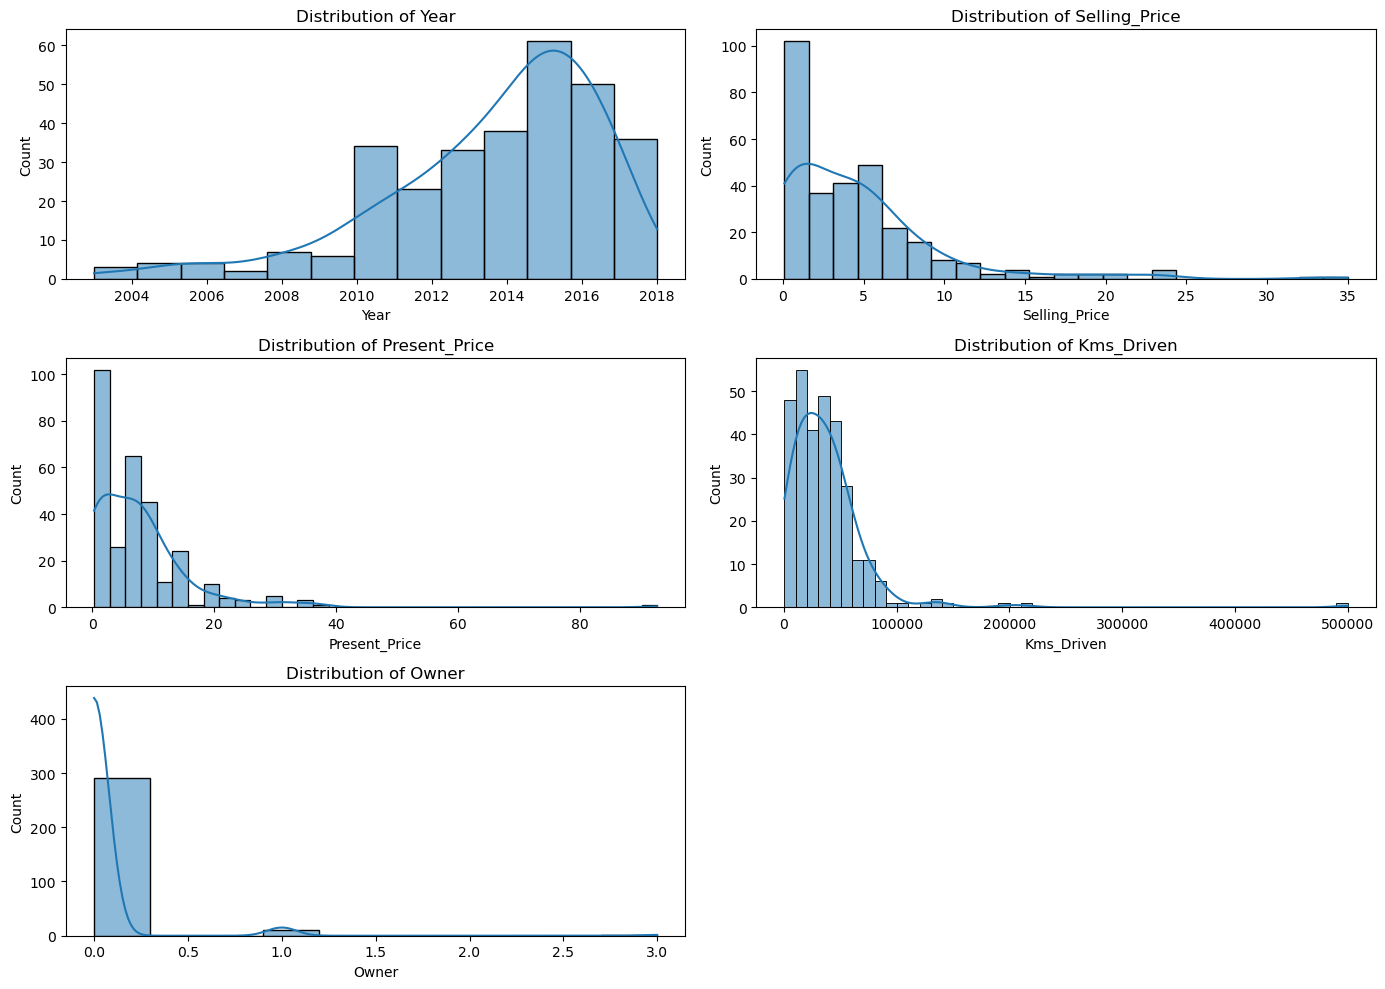

In [7]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

C:\Users\Mauro\AppData\Local\Temp\ipykernel_12168\2690752540.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='Year', y='Selling_Price', marker='o', ci=None)


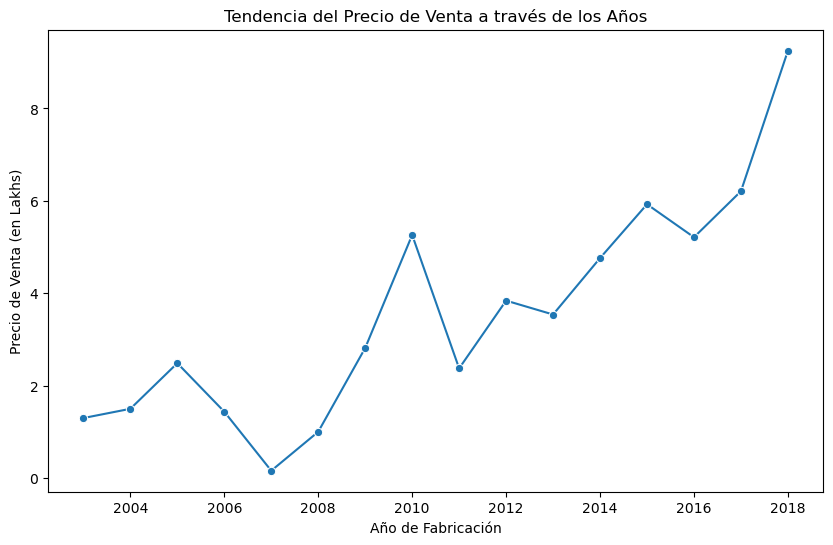

In [8]:
#TENDENCIA PRECIO AÑOS
plt.figure(figsize=(10, 6)) 
sns.lineplot(data=data, x='Year', y='Selling_Price', marker='o', ci=None)
plt.title('Tendencia del Precio de Venta a través de los Años')
plt.xlabel('Año de Fabricación')
plt.ylabel('Precio de Venta (en Lakhs)')
plt.show()

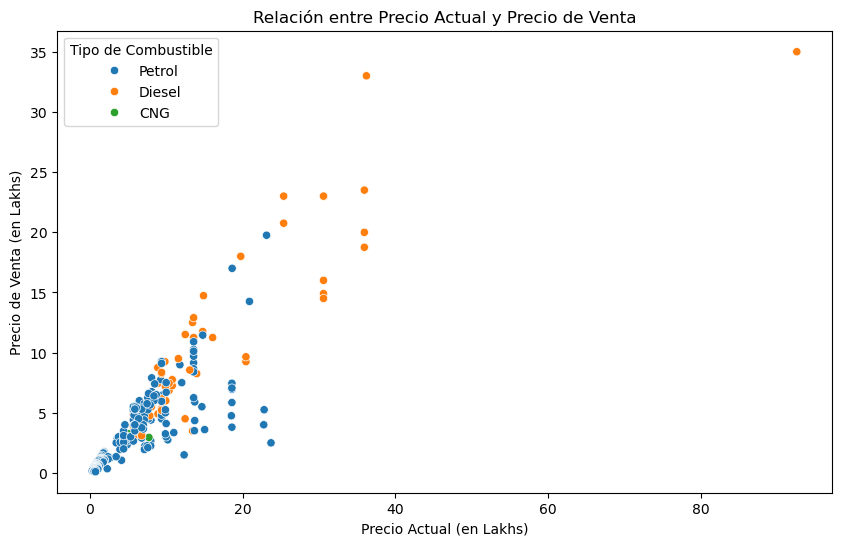

In [9]:
#PRECIO ACTUAL Y PRECIO DE VENTA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=data, hue='Fuel_Type')
plt.title('Relación entre Precio Actual y Precio de Venta')
plt.xlabel('Precio Actual (en Lakhs)')
plt.ylabel('Precio de Venta (en Lakhs)')
plt.legend(title='Tipo de Combustible')
plt.show()

C:\Users\Mauro\AppData\Local\Temp\ipykernel_12168\4132573934.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fuel_Type', y='Selling_Price', data=data, palette='pastel')


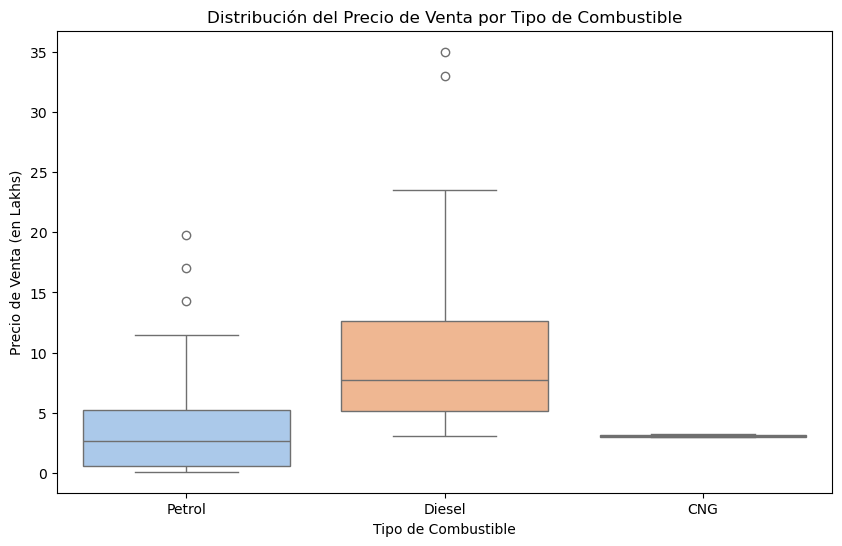

In [10]:
#PRECIO VENTA SEGUN COMBUSTIBLE
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=data, palette='pastel')
plt.title('Distribución del Precio de Venta por Tipo de Combustible')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Precio de Venta (en Lakhs)')
plt.show()

C:\Users\Mauro\AppData\Local\Temp\ipykernel_12168\616699407.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='Year', y='Kms_Driven', marker='o', ci=None)


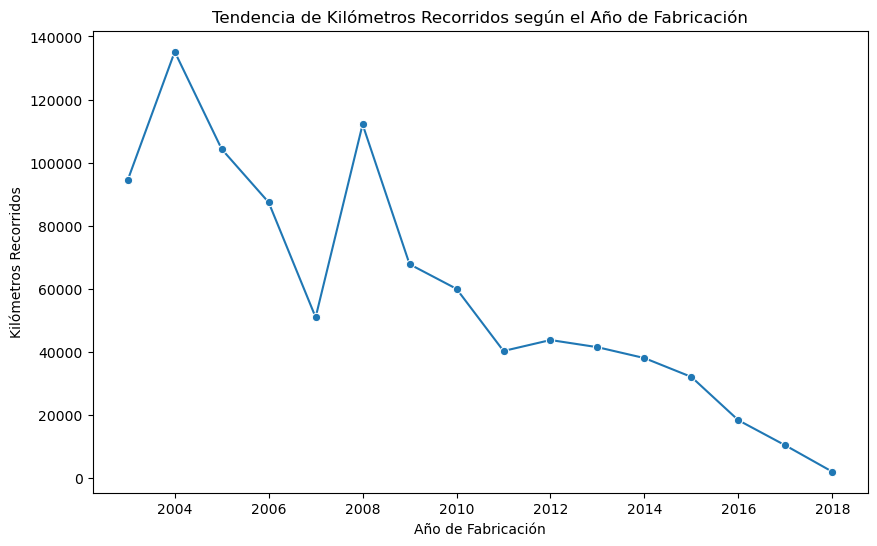

In [11]:
#  Kilometraje según el Año
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Year', y='Kms_Driven', marker='o', ci=None)
plt.title('Tendencia de Kilómetros Recorridos según el Año de Fabricación')
plt.xlabel('Año de Fabricación')
plt.ylabel('Kilómetros Recorridos')
plt.show()

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.preprocessing import LabelEncoder

In [13]:
data = data.copy()  # Crear copia para evitar modificar datos originales
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [14]:
X = data.drop('Selling_Price', axis=1)  # Aquí asumimos 'Selling_Price' como la variable objetivo
y = data['Selling_Price']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [16]:
correlation_matrix = data.corr()
print("Correlación con 'Selling_Price':\n", correlation_matrix['Selling_Price'].sort_values(ascending=False))


Correlación con 'Selling_Price':
 Selling_Price    1.000000
Present_Price    0.878983
Car_Name         0.499198
Year             0.236141
Kms_Driven       0.029187
Owner           -0.088344
Transmission    -0.367128
Fuel_Type       -0.509467
Seller_Type     -0.550724
Name: Selling_Price, dtype: float64


In [17]:
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (210, 8)
Tamaño del conjunto de prueba: (91, 8)
